In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
train = pd.read_csv("/kaggle/input/mock-test-2-mse-2/train.csv")
test = pd.read_csv("/kaggle/input/mock-test-2-mse-2/test.csv")

print(train.shape)
print(test.shape)

(15000, 20)
(10000, 19)


In [9]:
id_column = test.columns[0]
tar_column = train.columns[-1]

print(id_column)
print(tar_column)

id
Status


In [13]:
num_col = train.select_dtypes(include = [np.number]).columns.tolist()
cat_col = train.select_dtypes(exclude = [np.number]).columns.tolist()

if id_column in num_col:
    num_col.remove(id_column)
if id_column in cat_col:
    cat_col.remove(id_column)
if tar_column in num_col:
    num_col.remove(tar_column)
if tar_column in cat_col:
    cat_col.remove(tar_column)

In [129]:
print(cat_col)
print(num_col)

['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']


In [14]:
for col in num_col:
    test[col] = test[col].fillna(train[col].median())
    train[col] = train[col].fillna(train[col].median())

for col in cat_col:
    test[col] = test[col].fillna(train[col].mode()[0])
    train[col] = train[col].fillna(train[col].mode()[0])

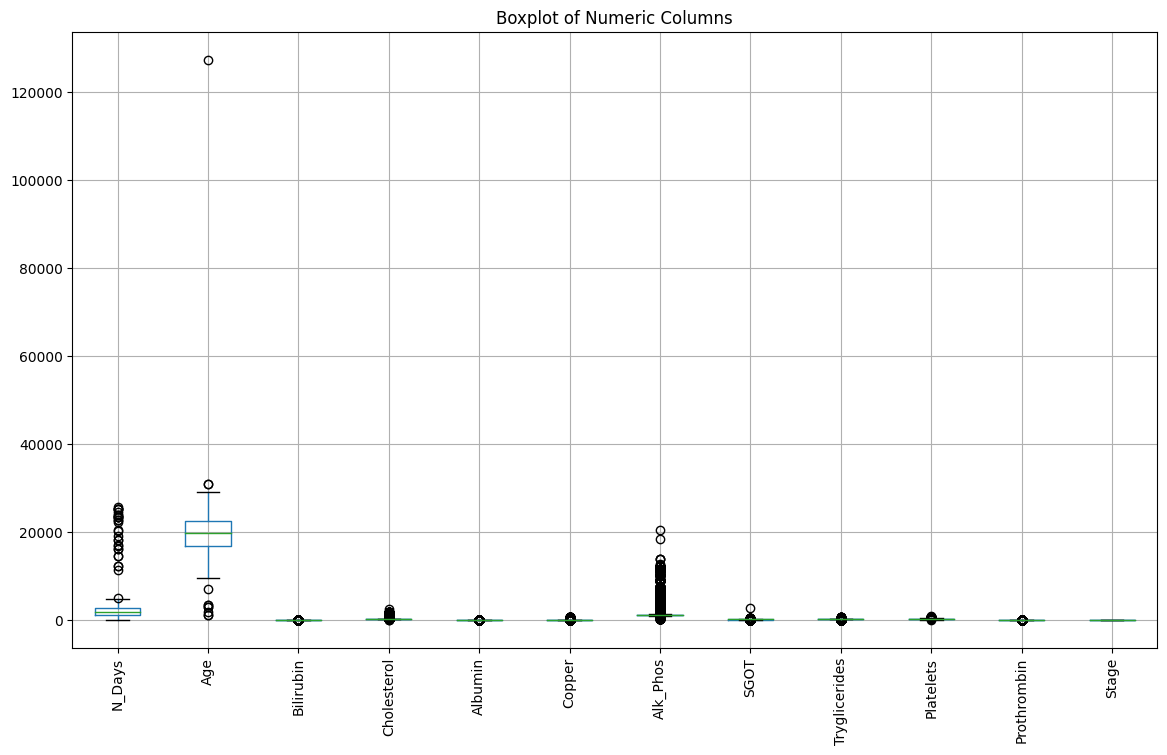

In [15]:
plt.figure(figsize=(14,8))
train[num_col].boxplot()
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=90)
plt.show()

In [16]:
def outlier(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - IQR*1.5
        upper = Q3 + IQR*1.5
        df[col] = df[col].clip(lower, upper)
    return df

train = outlier(train, num_col)
test = outlier(test, num_col)

In [23]:
le = LabelEncoder()
for col in cat_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

target_le = LabelEncoder()
train[tar_column] = target_le.fit_transform(train[tar_column])

In [24]:
X = train.drop([id_column,tar_column], axis = 1)
y = train[tar_column]

X_TEST = test.drop(id_column, axis = 1)

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_TEST)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [28]:
model = RandomForestClassifier(n_estimators = 1500, max_depth = 30)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=1500)

In [30]:
y_pred = model.predict(X_test)

In [31]:
acc = accuracy_score(y_pred, y_test)
acc

0.843

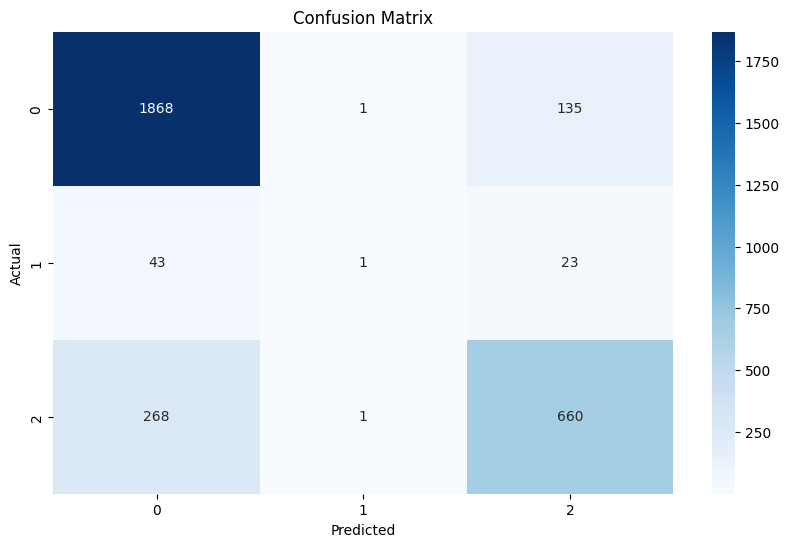

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
y_prediction = model.predict(X_test_scaled)

In [34]:
print(y_prediction)

[0 0 0 ... 0 2 0]


In [40]:
final_labels = target_le.inverse_transform(y_prediction)
submission = pd.DataFrame({
    id_column : test[id_column],
    tar_column : final_labels
})
submission.to_csv("submission.csv", index = False)

In [41]:
submission.head()

,id,Status
0,15000,0
1,15001,0
2,15002,0
3,15003,2
4,15004,0
